<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#无梯度下降法的实现" data-toc-modified-id="无梯度下降法的实现-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>无梯度下降法的实现</a></span><ul class="toc-item"><li><span><a href="#单变量线性回归" data-toc-modified-id="单变量线性回归-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>单变量线性回归</a></span></li></ul></li><li><span><a href="#batch-gradient-decent（批量梯度下降）" data-toc-modified-id="batch-gradient-decent（批量梯度下降）-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>batch gradient decent（批量梯度下降）</a></span><ul class="toc-item"><li><span><a href="#单变量线性回归" data-toc-modified-id="单变量线性回归-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>单变量线性回归</a></span></li><li><span><a href="#多变量线性回归" data-toc-modified-id="多变量线性回归-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>多变量线性回归</a></span></li><li><span><a href="#scikit-learn的线性回归函数进行预测" data-toc-modified-id="scikit-learn的线性回归函数进行预测-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>scikit-learn的线性回归函数进行预测</a></span></li><li><span><a href="#normal-equation(正规方程)" data-toc-modified-id="normal-equation(正规方程)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>normal equation(正规方程)</a></span></li></ul></li></ul></div>

[TOC]

# 无梯度下降法的实现

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header = None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


使用plot显示当前数据的离散点

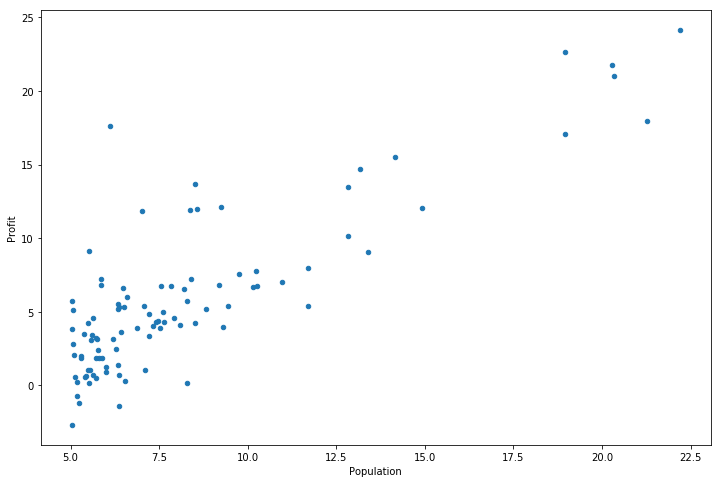

In [4]:
data.plot(kind='scatter', x = 'Population', y = 'Profit', figsize=(12,8))
plt.show()

房价预测函数定义
**假设函数**  
$h_\theta(x) = \theta_1x$  
**代价函数**  
$J(\theta_1) = \frac{1}{2m}\sum\limits_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$  
其中:  
$h_\theta(x) = \theta^TX = \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n$

## 单变量线性回归

In [5]:
def computeCost(X, y , theta):
    inner = np.power(((X* theta.T) -y), 2)
    return np.sum(inner) /(2 * len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。插入的这一列是为了矩阵的运算,全1的列

In [6]:
data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


初始化一些变量

In [7]:
# training(X) data and  target variable(y)
cols = data.shape[1]
X = data.iloc[:, 0: cols-1] # x是所有行,去掉最后一列
y = data.iloc[:,cols-1: cols]# y是所有列,去掉最后一行

观察下 X (训练集) and y (目标变量)是否正确.

In [8]:
X.head(n=6) # head函数 输出 前5行,需要指令前N行时,设置n的值,如 'n=6'

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
5,1,8.3829


In [9]:
y.head(n=6)

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233
5,11.8860


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

theta是一个(1,2)的矩阵

In [11]:
theta

matrix([[0, 0]])

看下当前定义的维度

In [12]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数(theta初始值为0)

In [13]:
computeCost(X,y,theta)

32.072733877455676

# batch gradient decent（批量梯度下降）

## 单变量线性回归

**梯度函数的定义**  
梯度函数的$\theta$值需要同步更新

$\theta_j:=\theta_j-\alpha \frac{\partial}{\partial{\theta_j}} J(\theta)$

In [14]:
def gradientDescent(X, y , theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X) * np.sum(term)))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

初始化一些附加的变量,学习率$\alpha$和要迭代的次数

In [15]:
alpha = 0.01
iters = 1000
alpha
iters

1000

使用梯度下降算法来将参数$\theta$来适合于训练集

In [16]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

最后,使用我们似合的参数计算训练模型 的代价函数(求出误差)

In [17]:
computeCost(X,y,g)

4.515955503078912

绘制线性模型及数据 ,直接的看出其拟合

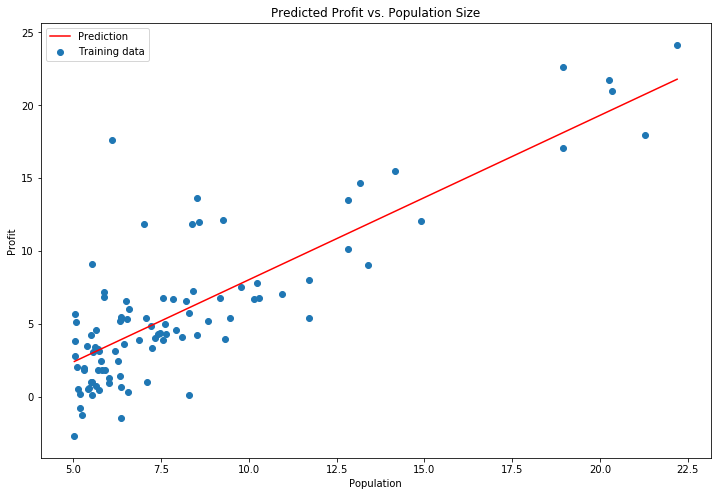

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0,1] * x)
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training data')
ax.legend(loc=2)
ax.set_ylabel('Profit')
ax.set_xlabel('Population')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度下降的函数也在每个训练迭代中输出 一个cost的向量,将其绘制出来.  
**请注意，代价总是降低 - 这是凸优化问题的一个例子**

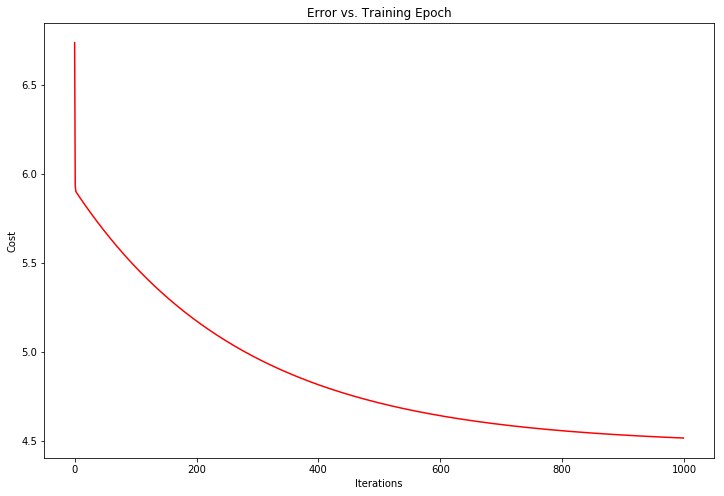

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [20]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names = ['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化(***特征进行缩放,以节省梯度下降的迭代次数***)。 这个对于pandas来说很简单

In [21]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序, 插入一列全1是为了矩阵运算的方便

In [22]:
data2.insert(0, 'Ones', 1) 

In [23]:
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[0:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2,y2, theta2, alpha, iters)
computeCost(X2, y2, g2)

0.13070336960771892

我们也可以快速查看这一个的训练进程。

Text(0.5, 1.0, 'Error vs Training Epoch')

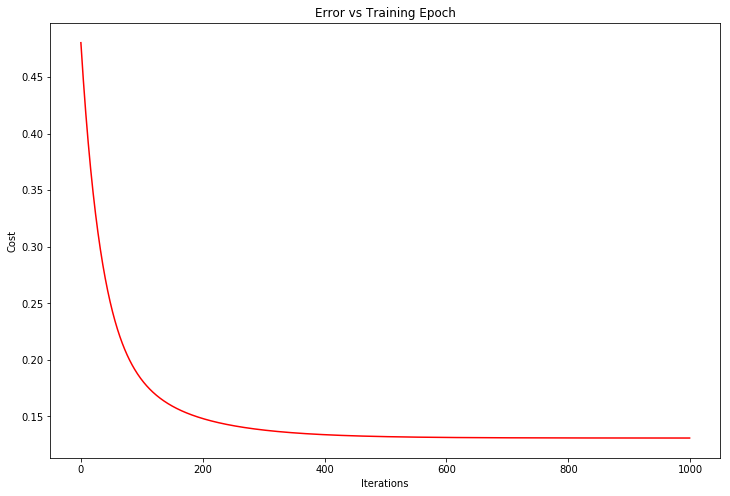

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training Epoch')

## scikit-learn的线性回归函数进行预测

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [26]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

scikit-learn model的预测表现

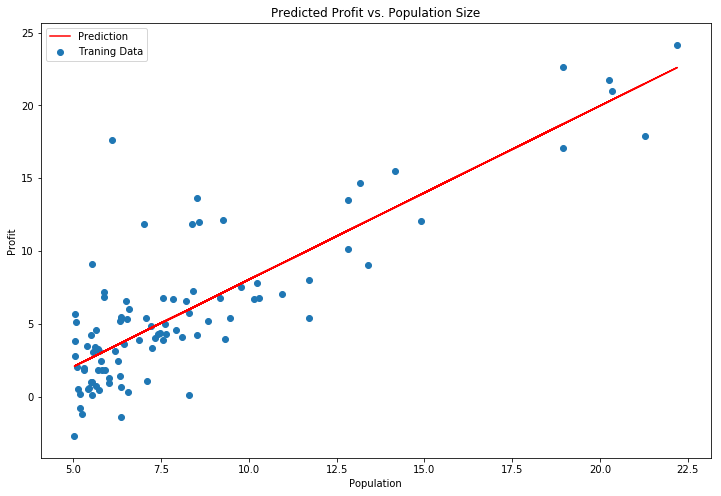

In [27]:
x = np.array(X[:,1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## normal equation(正规方程)

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [28]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)# X.T@X等价于X.T.dot(X)
    #theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [29]:
final_theta2 = normalEqn(X,y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [30]:
import platform
platform.python_version()

'3.6.8'